## Exercise 1
1. Download the `wdbc.names` and `wdbc.data` text files in the Lab8 folder on GitHub. These come from the UCI repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
1. Use the native `open` command of Python to display the txt file `wdbs.names`
1. Read the dataset from the `wdbc.data` file into a variable called `data` using pandas

In [174]:
import pandas as pd 

print("########\n# Step 2\n########")
# Showing WDBC names.
filepath = 'wdbc.names'
with open(filepath) as fp:
   line = fp.readline()
   cnt = 1
   while line:
       print("Line {}: {}".format(cnt, line.strip()))
       line = fp.readline()
       cnt += 1

print("\n\n########\n# Step 3\n########")
# Showing WDBC Data
data = pd.read_csv("wdbc.data") 
# print(data)

Line 1: 1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)
Line 2: 
Line 3: 2. Source Information
Line 4: 
Line 5: a) Creators:
Line 6: 
Line 7: Dr. William H. Wolberg, General Surgery Dept., University of
Line 8: Wisconsin,  Clinical Sciences Center, Madison, WI 53792
Line 9: wolberg@eagle.surgery.wisc.edu
Line 10: 
Line 11: W. Nick Street, Computer Sciences Dept., University of
Line 12: Wisconsin, 1210 West Dayton St., Madison, WI 53706
Line 13: street@cs.wisc.edu  608-262-6619
Line 14: 
Line 15: Olvi L. Mangasarian, Computer Sciences Dept., University of
Line 16: Wisconsin, 1210 West Dayton St., Madison, WI 53706
Line 17: olvi@cs.wisc.edu
Line 18: 
Line 19: b) Donor: Nick Street
Line 20: 
Line 21: c) Date: November 1995
Line 22: 
Line 23: 3. Past Usage:
Line 24: 
Line 25: first usage:
Line 26: 
Line 27: W.N. Street, W.H. Wolberg and O.L. Mangasarian
Line 28: Nuclear feature extraction for breast tumor diagnosis.
Line 29: IS&T/SPIE 1993 International Symposium on Electronic Imaging:

## Exercise 2
1. Display the data header using pandas
1. Are there any columns that are not useful to analyzing this data?
1. Decide what to do with the non-numerical data values, and modify your dataframe
1. Extract the column of labels (Malignant or Benign, which should now be numerical values) from the dataframe and store it as a variable called `labels`

In [175]:
# 1. Display the data header using pandas
#########################################
print("########\n# Step 1\n########")

headers = ['ID', "Label",
            "mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension",          
            "S.D radius", "S.D texture", "S.D perimeter", "S.D mean area", "S.D smoothness ", "S.D compactness", "S.D concavity", "S.D concave points", "S.D symmetry", "S.D fractal dimension",
            "worst radius", "worst texture", "worst perimeter", "worst mean area", "worst smoothness", "worst compactness", "worst concavity", ' worst concave points', 'worst symmetry', 'worst fractal dimension' ] 

data.to_csv("new.csv", header=headers, index=False)
df = pd.read_csv("new.csv")

print(df)



# 2. Are there any columns that are not useful to analyzing this data?
#######################################################################
## After researching the columns, there is only "ID" column which will not be required while analyzing the data. 
### Diagnosis, on the other hand, has a part in categorizing the data during the analysis.



# 3. Decide what to do with the non-numerical data values, and modify your dataframe
####################################################################################
## Non-numerical values will be seperated from numerical values (excluding ID)
### Main purpose is to categories them later.
numerical_data = df.loc[:, ~df.columns.isin(['ID', "Label"])]
# print(numerical_data)



# 4. Extract the column of labels (Malignant or Benign, which should now be numerical values) from the dataframe 
#    and store it as a variable called labels
################################################################################################################
# Note, M = 1, B = 0
labels = df["Label"].factorize(['B','M'])[0]
header_labels = pd.DataFrame(data=labels, columns=["Labels"])
# print(labels) # 568


########
# Step 1
########
           ID Label  mean radius  mean texture  mean perimeter  mean area  \
0      842517     M        20.57         17.77          132.90     1326.0   
1    84300903     M        19.69         21.25          130.00     1203.0   
2    84348301     M        11.42         20.38           77.58      386.1   
3    84358402     M        20.29         14.34          135.10     1297.0   
4      843786     M        12.45         15.70           82.57      477.1   
..        ...   ...          ...           ...             ...        ...   
563    926424     M        21.56         22.39          142.00     1479.0   
564    926682     M        20.13         28.25          131.20     1261.0   
565    926954     M        16.60         28.08          108.30      858.1   
566    927241     M        20.60         29.33          140.10     1265.0   
567     92751     B         7.76         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean con

## Exercise 3
1. Plot the data in 5 different ways of your choosing (i.e., plot column 2 vs. column 3 or column 8 vs. column 1, etc.)
    1. Your plot should be a scatter plot and should color the points according to whether the cancer is Malignant or Benign
1. Now, create new variables `x` and `y` which are numpy arrays from your `data` and `labels` dataframes
1. Using these, run the segment of code in the cell below which implements PCA on x (color code is green for benign and red for malignant)
1. Compare this plot to the ones from step 1. Do you notice any difference? Do you think it would be easier to separate malignant and benign tumors based on one of these plots over the others?

########
# Step 1
########


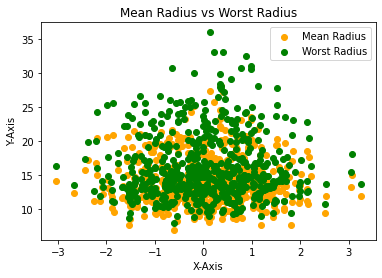

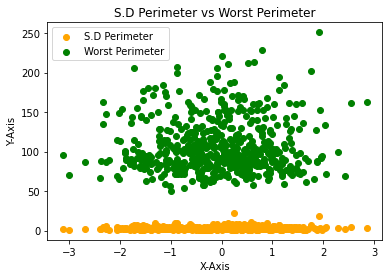

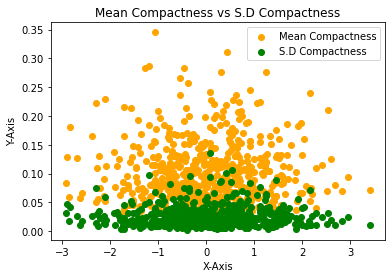

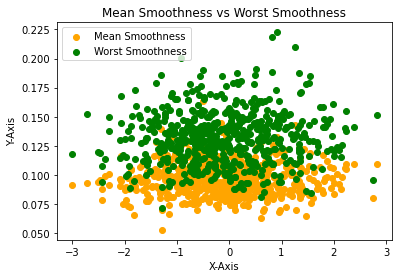

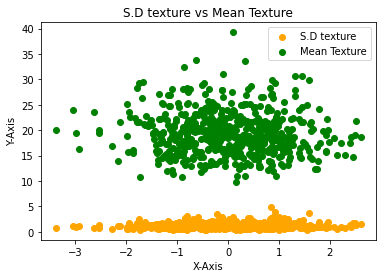

########
# Step 2
########


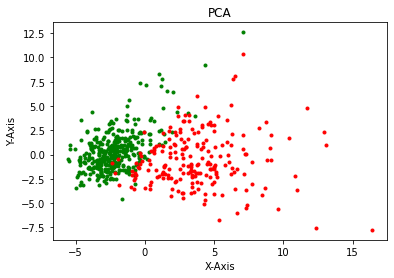

In [177]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np

def comparison_plot_maker(data_1, data_2, name, column_name_1, column_name_2):
    # Scaling Data for testing
    # data_1 = scale(data_1)
    # data_2 = scale(data_2)

    range =  np.random.randn(len(data_1))
    plt.scatter(range, data_1, label=column_name_1, color='orange')
    plt.scatter(range, data_2, label=column_name_2, color='green')
    plt.title(name)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.legend()
    plt.show()
    
# 1. Plot the data in 5 different ways of your choosing
#######################################################    
print('########\n# Step 1\n########')
comparison_plot_maker(numerical_data["mean radius"], numerical_data["worst radius"], "Mean Radius vs Worst Radius", "Mean Radius", "Worst Radius")
comparison_plot_maker(numerical_data["S.D perimeter"], numerical_data["worst perimeter"], "S.D Perimeter vs Worst Perimeter", "S.D Perimeter", "Worst Perimeter")
comparison_plot_maker(numerical_data["mean compactness"], numerical_data["S.D compactness"], "Mean Compactness vs S.D Compactness", "Mean Compactness", "S.D Compactness")
comparison_plot_maker(numerical_data["mean smoothness"], numerical_data["worst smoothness"], "Mean Smoothness vs Worst Smoothness","Mean Smoothness", "Worst Smoothness")
comparison_plot_maker(numerical_data["S.D texture"], numerical_data["mean texture"], "S.D texture vs Mean Texture", "S.D texture", "Mean Texture")



# 2. Variables x and y, numpy arrays from data and labels dataframes
#################################################################
# Scaling Data
scaler = StandardScaler()
scaler.fit(numerical_data)
# print(scaled_data)

# Assigning Variables
X = scaler.transform(numerical_data)
y = labels



# 3. Implements PCA on X (green for benign; red for malignant)
##############################################################
print('########\n# Step 2\n########')

# PCA
PCA3=PCA(n_components=2)
# print(X.shape)
PCA3.fit(X)
XPCA = PCA3.transform(X)
# print(XPCA.shape)

# Plotting
plt.figure()
plt.title("PCA")
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.plot(XPCA[y==0,0],XPCA[y==0,1],'g.')
plt.plot(XPCA[y==1,0],XPCA[y==1,1],'r.')

plt.show()


# 4. Compare plot from step 1. 
## Do you notice any difference? 
## Would it be easier to separate malignant and benign tumors based on these plots over the others?
#####################################################################################################

# During the match of Step 1 and Step 2, it is harder to seperate malignant and benign in step 1 since 
## they are not a combined version like PCA, which makes the results more relieable and accurate. 

## On Another note, when taking scalers of data from step 1, it creates a combined data for column 1 and 2, 
### making it much more harder to seperate or realize its accuracy.
